In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

In [2]:
def getImage(path):
    img = cv.imread(path)
    img_cvt = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_resized = cv.resize(img_cvt, (512, 512), interpolation=cv.INTER_AREA)
    return img_resized


In [3]:
def RGB2HEX(color):
   return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [4]:
# function that extracts top colors present in a image using K-Means clustering and returns them in rgb format
def getTopColors(image, no_of_colors=5, show_chart=False):
    pixel_data = image.reshape((image.shape[0]*image.shape[1], 3))
    clf = KMeans(no_of_colors)
    clf.fit_predict(pixel_data)
    count = Counter(clf.labels_)
    color_centers = clf.cluster_centers_
    ordered_colors = [color_centers[i] for i in count.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in count.keys()]
    rgb_colors = [ordered_colors[i] for i in count.keys()]
    if (show_chart):
        plt.figure(figsize=(8, 6))
        plt.pie(count.values(), labels=hex_colors, colors=hex_colors)
    return np.array(rgb_colors, dtype='uint8'), count.values()


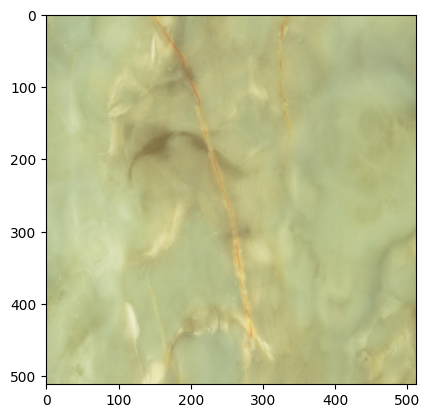

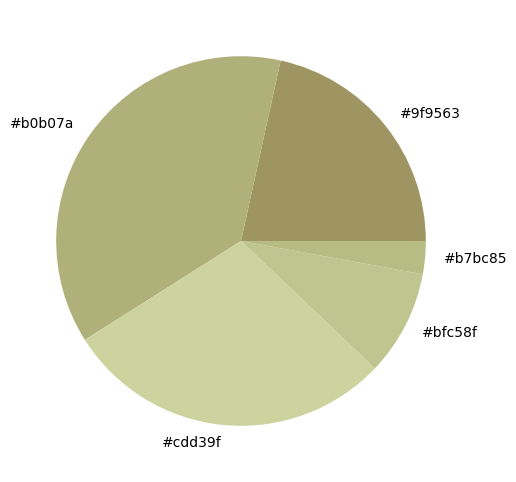

In [6]:
image = getImage("marble/7.jpeg")
plt.imshow(image)
colors ,count= getTopColors(image, 5, True)

In [69]:
for i in range(len(colors)):
    print(RGB2HEX(colors[i]))


#a67631
#d2bd81
#ba9149
#6a542c
#c7a962


In [70]:
count

dict_values([39447, 82407, 72208, 57441, 10641])